In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence,to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook   ##顯示進度條
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import time

from tensorflow.keras.models import Model
from tensorflow.keras import optimizers


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_train = df_train.drop(labels=['Id'],axis=1)
df_test = pd.read_csv('./data/test.csv')
df_test = df_test.drop(labels=['Id'],axis=1)

In [4]:
X_train = df_train.drop(labels=['Cover_Type'],axis=1).values
y_train = df_train['Cover_Type'].values

X_val = df_test.values
y_val = pd.read_csv('./data/ans.csv').drop(labels=['Id'],axis=1).values

In [5]:
scaler = MinMaxScaler()
X_train = X_train.astype(np.float32)
X_train = scaler.fit_transform(X_train)

X_val = X_val.astype(np.float32)
X_val = scaler.fit_transform(X_val)

# one hot

In [6]:
y_train = to_categorical(y_train-1)
y_val = to_categorical(y_val-1)

In [7]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(X_train,y_train , test_size=.2 , random_state=42 )

# build model

In [8]:
(X_train.shape[1],)

(54,)

In [9]:
X_train.shape[1]

54

In [67]:
def build_model():
    model_input = layers.Input(shape=(X_train.shape[1],))
    x = layers.Dense(512,activation='relu')(model_input)
    x = layers.Dense(256,activation='relu')(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dense(7,activation='softmax')(x)
    
    return Model(model_input ,x)
    

In [68]:
model = build_model()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               28160     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 903       
Total params: 193,287
Trainable params: 193,287
Non-trainable params: 0
_________________________________________________________________


# optimizer , loss , metrics

In [69]:
opt = optimizers.Adam(lr=0.001 )
model.compile(loss='categorical_crossentropy' , optimizer=opt , metrics=['acc'])

# callbacks - ModelCheckpoint , early stopping

In [70]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

check_pointer = ModelCheckpoint(filepath='./weights.hdf5',save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [71]:
history = model.fit(X_train,y_train,
                    batch_size=32,
                    epochs=100, 
                    shuffle=True,
                    validation_split=0.3,
                    callbacks=[check_pointer,early_stop])



Train on 10054 samples, validate on 4310 samples
Epoch 1/100
10054/10054 [==============================] - 1s 124us/sample - loss: 0.9447 - acc: 0.6053 - val_loss: 0.7858 - val_acc: 0.6580
Epoch 2/100
10054/10054 [==============================] - 1s 73us/sample - loss: 0.7542 - acc: 0.6768 - val_loss: 0.6936 - val_acc: 0.7002
Epoch 3/100
10054/10054 [==============================] - 1s 74us/sample - loss: 0.6957 - acc: 0.7050 - val_loss: 0.6607 - val_acc: 0.7162
Epoch 4/100
10054/10054 [==============================] - 1s 75us/sample - loss: 0.6610 - acc: 0.7190 - val_loss: 0.6346 - val_acc: 0.7253
Epoch 5/100
10054/10054 [==============================] - 1s 73us/sample - loss: 0.6338 - acc: 0.7264 - val_loss: 0.6144 - val_acc: 0.7346
Epoch 6/100
10054/10054 [==============================] - 1s 74us/sample - loss: 0.5953 - acc: 0.7429 - val_loss: 0.6015 - val_acc: 0.7473
Epoch 7/100
10054/10054 [==============================] - 1s 73us/sample - loss: 0.5826 - acc: 0.7473 - val_l

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# 畫圖

In [73]:
import matplotlib.pyplot as plt

In [74]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [75]:
epochs_ = range(1,len(acc)+1)

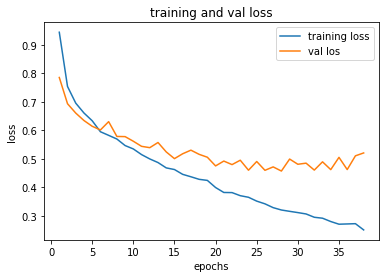

In [76]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

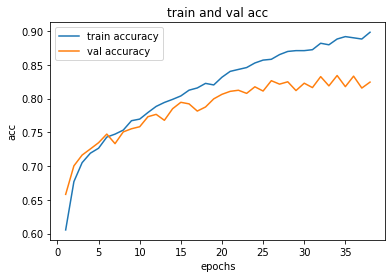

In [77]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [78]:
train_x.shape

(11491, 54)

In [79]:
train_y.shape

(11491, 7)

In [80]:
from sklearn.metrics import accuracy_score
# y_val=np.argmax(y_val,axis=1)
pred =  np.argmax(model.predict(X_val), axis=1)
accuracy_score(y_val, pred)

0.7195767195767195

# 另一種不寫死的方法

In [13]:
batch_size=32
epochs=10
every_print =5

In [27]:
model = build_model()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [28]:


train_epoch_losses , valid_epoch_losses = [],[]
train_epoch_acc , valid_epoch_acc = [],[]

for i in range(epochs):
    start_time = time.time()
    print(f"\nepoch: {i+1}/{epochs} \n")
    
    batch_num = int(np.ceil(len(train_x)/batch_size))
    split_step = batch_num // every_print
    
    train_losses = []
    train_batch_acc = []
    
    for j in range(batch_num):
        
        batch_x = train_x[j*batch_size:min((j+1)*batch_size , len(train_x))]
        batch_y = train_y[j*batch_size:min((j+1)*batch_size , len(train_y))]
        batch_loss , batch_acc = model.train_on_batch(batch_x , batch_y)
        
        
        
        train_losses.append(batch_loss)
        train_batch_acc.append(batch_acc)
        
        
        if j%split_step==0:
            print('train_loss:%5.3f \ttrain_acc:%5.3f'  % (batch_loss,batch_acc))
    
    duration = time.time() - start_time
    
    valid_loss , valid_acc = model.test_on_batch(test_x , test_y)
    print(f"epoch {i+1}: loss:{valid_loss:5.3f}\tacc:{valid_acc*100:5.2f}%")
    print( f"time per epoch: {duration:4.4f} sec \n") 
    
    train_loss_avg = np.mean(train_losses)
    train_acc_avg = np.mean(train_batch_acc)
    
    train_epoch_losses.append(train_loss_avg)
    train_epoch_acc.append(train_acc_avg)
    
    valid_epoch_losses.append(valid_loss)
    valid_epoch_acc.append(valid_acc)
        
    
            
            
            
            
        


epoch: 1/10 

train_loss:1.955 	train_acc:0.125
train_loss:1.234 	train_acc:0.375
train_loss:0.923 	train_acc:0.625
train_loss:0.830 	train_acc:0.688
train_loss:0.622 	train_acc:0.719
epoch 1: loss:0.827	acc:64.253%
time per epoch: 2.6224 sec 


epoch: 2/10 

train_loss:0.828 	train_acc:0.656
train_loss:1.116 	train_acc:0.438
train_loss:0.702 	train_acc:0.781
train_loss:0.749 	train_acc:0.719
train_loss:0.564 	train_acc:0.750
epoch 2: loss:0.752	acc:67.595%
time per epoch: 1.8685 sec 


epoch: 3/10 

train_loss:0.696 	train_acc:0.750
train_loss:1.037 	train_acc:0.562
train_loss:0.627 	train_acc:0.781
train_loss:0.699 	train_acc:0.750
train_loss:0.529 	train_acc:0.719
epoch 3: loss:0.704	acc:69.892%
time per epoch: 2.8136 sec 


epoch: 4/10 

train_loss:0.603 	train_acc:0.812
train_loss:1.005 	train_acc:0.531
train_loss:0.581 	train_acc:0.781
train_loss:0.643 	train_acc:0.750
train_loss:0.523 	train_acc:0.719
epoch 4: loss:0.681	acc:70.171%
time per epoch: 2.6157 sec 


epoch: 5/10 

t

# 自定義model

In [10]:
class network(keras.Model):
    def __init__(self):
        super(network,self).__init__()
        self.layer_1 = layers.Dense(512 , activation='relu' )
        self.layer_2 = layers.Dense(256 , activation='relu')
        self.layer_3 = layers.Dense(128 , activation='relu' )
        self.output_layer = layers.Dense(7 , activation='softmax',)
        
    def call(self,x):
        x_1 = self.layer_1(x)
        x_2 = self.layer_2(x_1)
        x_3 = self.layer_3(x_2)
        predict = self.output_layer(x_3)
        
        return predict

In [11]:
model = network()
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:

train_epoch_losses , valid_epoch_losses = [],[]
train_epoch_acc , valid_epoch_acc = [],[]
epochs=100
batch_size=32
every_print=10
for i in range(epochs):
    start_time = time.time()
    print(f"\nepoch: {i+1}/{epochs} \n")
    
    batch_num = int(np.ceil(len(train_x)/batch_size))
    split_step = batch_num // every_print
    
    train_losses = []
    train_batch_acc = []
    
    for j in range(batch_num):
        
        batch_x = train_x[j*batch_size:min((j+1)*batch_size , len(train_x))]
        batch_y = train_y[j*batch_size:min((j+1)*batch_size , len(train_y))]
        batch_loss , batch_acc = model.train_on_batch(batch_x , batch_y)
        
        
        
        train_losses.append(batch_loss)
        train_batch_acc.append(batch_acc)
        
        
        if j%split_step==0:
            print('train_loss:%5.3f \ttrain_acc:%5.3f'  % (batch_loss,batch_acc))
    
    duration = time.time() - start_time
    
    valid_loss , valid_acc = model.test_on_batch(test_x , test_y)
    print(f"epoch {i+1}: loss:{valid_loss:5.3f}\tacc:{valid_acc*100:5.2f}%")
    print( f"time per epoch: {duration:4.4f} sec \n") 
    
    train_loss_avg = np.mean(train_losses)
    train_acc_avg = np.mean(train_batch_acc)
    
    train_epoch_losses.append(train_loss_avg)
    train_epoch_acc.append(train_acc_avg)
    
    valid_epoch_losses.append(valid_loss)
    valid_epoch_acc.append(valid_acc)


epoch: 1/100 

train_loss:1.942 	train_acc:0.188
train_loss:1.156 	train_acc:0.438
train_loss:1.172 	train_acc:0.406
train_loss:0.983 	train_acc:0.500
train_loss:0.855 	train_acc:0.625
train_loss:0.770 	train_acc:0.625
train_loss:0.806 	train_acc:0.719
train_loss:0.832 	train_acc:0.625
train_loss:0.581 	train_acc:0.719
train_loss:0.697 	train_acc:0.719
epoch 1: loss:0.811	acc:64.60%
time per epoch: 1.6642 sec 


epoch: 2/100 

train_loss:0.831 	train_acc:0.688
train_loss:0.909 	train_acc:0.594
train_loss:1.070 	train_acc:0.469
train_loss:0.814 	train_acc:0.625
train_loss:0.707 	train_acc:0.719
train_loss:0.646 	train_acc:0.719
train_loss:0.746 	train_acc:0.688
train_loss:0.678 	train_acc:0.656
train_loss:0.528 	train_acc:0.750
train_loss:0.658 	train_acc:0.688
epoch 2: loss:0.709	acc:69.61%
time per epoch: 0.8894 sec 


epoch: 3/100 

train_loss:0.671 	train_acc:0.781
train_loss:0.832 	train_acc:0.656
train_loss:1.021 	train_acc:0.531
train_loss:0.726 	train_acc:0.656
train_loss:0.630